In [2]:
#from scipy import misc
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import matplotlib as mp
import os
import math
import imageio

#compatibility for tf v2.0
if(tf.__version__.split('.')[0]=='2'):
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior() 

In [3]:
# setup

def weight_variable(shape):
    '''
    Initialize weights
    :param shape: shape of weights, e.g. [w, h ,Cin, Cout] where
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters
    Cout: the number of filters
    :return: a tensor variable for weights with initial values
    '''

    # IMPLEMENT YOUR WEIGHT_VARIABLE HERE
    
    w = tf.truncated_normal(shape, stddev=0.1)
    W = tf.Variable(w)
    
    return W

def bias_variable(shape):
    '''
    Initialize biases
    :param shape: shape of biases, e.g. [Cout] where
    Cout: the number of filters
    :return: a tensor variable for biases with initial values
    '''

    # IMPLEMENT YOUR BIAS_VARIABLE HERE
    B = tf.constant(0.1, shape=shape)
    b = tf.Variable(B)

    return b

def conv2d(x, W):
    '''
    Perform 2-D convolution
    :param x: input tensor of size [N, W, H, Cin] where
    N: the number of images
    W: width of images
    H: height of images
    Cin: the number of channels of images
    :param W: weight tensor [w, h, Cin, Cout]
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters = the number of channels of images
    Cout: the number of filters
    :return: a tensor of features extracted by the filters, a.k.a. the results after convolution
    '''

    # IMPLEMENT YOUR CONV2D HERE
    
    h_conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

    return h_conv

def max_pool_2x2(x):
    '''
    Perform non-overlapping 2-D maxpooling on 2x2 regions in the input data
    :param x: input data
    :return: the results of maxpooling (max-marginalized + downsampling)
    '''

    # IMPLEMENT YOUR MAX_POOL_2X2 HERE
    
    h_max = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    return h_max

In [4]:
ntrain = 1000 # per class
ntest = 100 # per class
nclass = 10 # number of classes
imsize = 28
nchannels = 1
batchsize = 100
result_dir = "./adam4"
hyper_pa = ['adam', 1e-3, 'relu', 5500]


Train = np.zeros((ntrain*nclass,imsize,imsize,nchannels))
Test = np.zeros((ntest*nclass,imsize,imsize,nchannels))
LTrain = np.zeros((ntrain*nclass,nclass))
LTest = np.zeros((ntest*nclass,nclass))

In [5]:
itrain = -1
itest = -1
for iclass in range(0, nclass):
    for isample in range(0, ntrain):
        path = '/home/arash/Desktop/Deep_Learning_Rice_Fall2022/Assignments/2/CIFAR10-1/Train/%d/Image%05d.png' % (iclass,isample)
        im = imageio.imread(path); # 28 by 28
        im = im.astype(float)/255
        itrain += 1
        Train[itrain,:,:,0] = im
        LTrain[itrain,iclass] = 1 # 1-hot lable
    for isample in range(0, ntest):
        path = '/home/arash/Desktop/Deep_Learning_Rice_Fall2022/Assignments/2/CIFAR10-1/Test/%d/Image%05d.png' % (iclass,isample)
        im = imageio.imread(path); # 28 by 28
        im = im.astype(float)/255
        itest += 1
        Test[itest,:,:,0] = im
        LTest[itest,iclass] = 1 # 1-hot lable

sess = tf.InteractiveSession()

tf_data = tf.placeholder("float32", shape=[None, imsize, imsize, nchannels])#tf variable for the data, remember shape is [None, width, height, numberOfChannels] 
tf_labels = tf.placeholder("float32", shape=[None, nclass])#tf variable for labels

/home/arash/anaconda3/envs/DL/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  
/home/arash/anaconda3/envs/DL/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  del sys.path[0]


2022-11-02 09:03:13.962061: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 09:03:13.988776: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2599990000 Hz
2022-11-02 09:03:13.989580: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x565451cd85d0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-02 09:03:13.989654: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
OMP: Info #155: KMP_AFFINITY: Initial OS proc set respected: 0-3
OMP: Info #216: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #157: KMP_AFFINITY: 4 available OS procs
OMP: Info #158: KMP_AFFINITY: Uniform topology
OMP: Info 

In [6]:
# model
#create your model

# First layer: 
Weight_conv1 = weight_variable([5,5,1,32])
bias_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(tf_data, Weight_conv1) + bias_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Second layer: 
Weight_conv2 = weight_variable([5,5,32,64])
bias_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, Weight_conv2) + bias_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# Third layer: 
Weight_fc1 = weight_variable([7*7*64, 1024])
bias_fc1 =  bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, Weight_fc1) + bias_fc1)
keep_prob = tf.placeholder('float')
drop_h_fc1 = tf.nn.dropout(h_fc1,keep_prob)

# Fourth layer: 
Weight_fc2 = weight_variable([1024,nclass])
bias_fc2 = bias_variable([nclass])
soft_layer = tf.nn.softmax(tf.matmul(drop_h_fc1, Weight_fc2) + bias_fc2)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# loss
#set up the loss, optimization, evaluation, and accuracy
learn_rate = 0.0001
cross_entropy = tf.reduce_mean(-tf.reduce_sum(tf_labels * tf.log(soft_layer)))

optimizer = tf.train.AdamOptimizer(hyper_pa[1]).minimize(cross_entropy)

evaluation = tf.equal(tf.argmax(soft_layer, 1), tf.argmax(tf_labels, 1))
accuracy = tf.reduce_mean(tf.cast(evaluation, "float"))

In [8]:
# optimization

nsamples = 10000
train_acc = []
test_acc = []
loss_log1 = []
loss_log2 = []


sess.run(tf.initialize_all_variables())
#sess.run(tf.global_variables_intializer())

batch_xs = np.zeros((batchsize, imsize, imsize, nchannels))#setup as [batchsize, width, height, numberOfChannels] and use np.zeros()
batch_ys = np.zeros((batchsize, nclass))#setup as [batchsize, the how many classes] 

iter_n = hyper_pa[3]

for i in range(iter_n): # try a small iteration size once it works then continue
    perm = np.arange(nsamples)
    np.random.shuffle(perm)
    for j in range(batchsize):
        batch_xs[j,:,:,:] = Train[perm[j],:,:,:]
        batch_ys[j,:] = LTrain[perm[j],:]
    if i%100 == 0:
        #calculate train accuracy and print it
        train_accuracy = accuracy.eval(feed_dict={tf_data: batch_xs, tf_labels: batch_ys, keep_prob: 1.0})
        train_loss = cross_entropy.eval(feed_dict={tf_data: batch_xs, tf_labels: batch_ys, keep_prob: 1.0})
        
        print("step %d, training accuracy %g" % (i,train_accuracy))
        print("test accuracy %g" % accuracy.eval(feed_dict={tf_data: Test, tf_labels: LTest, keep_prob: 1.0}))
        
        train_acc.append(train_accuracy)
        test_acc.append(accuracy.eval(feed_dict={tf_data: Test, tf_labels: LTest, keep_prob: 1.0}))
        
        loss_log1.append(train_loss)
        loss_log2.append(cross_entropy.eval(feed_dict={tf_data: Test, tf_labels: LTest, keep_prob: 1.0}))
        
    optimizer.run(feed_dict={tf_data: batch_xs, tf_labels: batch_ys, keep_prob: 0.5}) # dropout only during training

Instructions for updating:
Use `tf.global_variables_initializer` instead.


OMP: Info #254: KMP_AFFINITY: pid 30544 tid 31165 thread 1 bound to OS proc set 1
OMP: Info #254: KMP_AFFINITY: pid 30544 tid 31167 thread 2 bound to OS proc set 2
OMP: Info #254: KMP_AFFINITY: pid 30544 tid 31168 thread 3 bound to OS proc set 3
OMP: Info #254: KMP_AFFINITY: pid 30544 tid 31169 thread 4 bound to OS proc set 0
OMP: Info #254: KMP_AFFINITY: pid 30544 tid 31164 thread 5 bound to OS proc set 1
OMP: Info #254: KMP_AFFINITY: pid 30544 tid 31170 thread 6 bound to OS proc set 2
OMP: Info #254: KMP_AFFINITY: pid 30544 tid 31171 thread 7 bound to OS proc set 3
OMP: Info #254: KMP_AFFINITY: pid 30544 tid 31172 thread 8 bound to OS proc set 0


step 0, training accuracy 0.11
test accuracy 0.093
step 100, training accuracy 0.28
test accuracy 0.219
step 200, training accuracy 0.39
test accuracy 0.285
step 300, training accuracy 0.36
test accuracy 0.335
step 400, training accuracy 0.33
test accuracy 0.385
step 500, training accuracy 0.37
test accuracy 0.396
step 600, training accuracy 0.39
test accuracy 0.403
step 700, training accuracy 0.41
test accuracy 0.404
step 800, training accuracy 0.5
test accuracy 0.433
step 900, training accuracy 0.42
test accuracy 0.443
step 1000, training accuracy 0.45
test accuracy 0.435
step 1100, training accuracy 0.55
test accuracy 0.453
step 1200, training accuracy 0.46
test accuracy 0.462
step 1300, training accuracy 0.52
test accuracy 0.443
step 1400, training accuracy 0.62
test accuracy 0.454
step 1500, training accuracy 0.6
test accuracy 0.465
step 1600, training accuracy 0.61
test accuracy 0.466
step 1700, training accuracy 0.52
test accuracy 0.472
step 1800, training accuracy 0.54
test acc

test accuracy 0.53


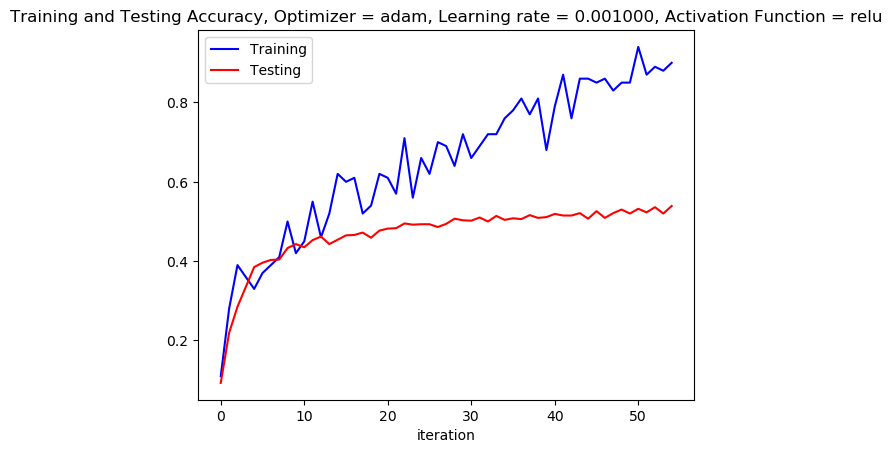

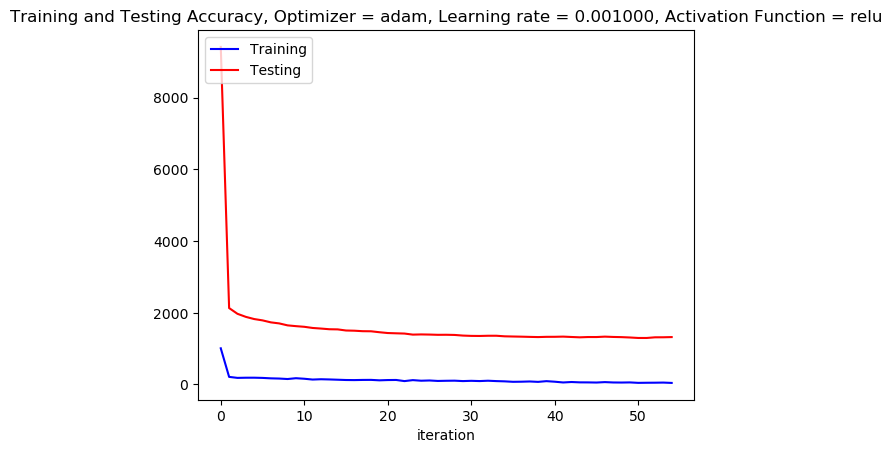

In [10]:
# test

print("test accuracy %g"% accuracy.eval(feed_dict={tf_data: Test, tf_labels: LTest, keep_prob: 1.0}))

plt.plot(train_acc, 'b', label = "Training")
plt.plot(test_acc, 'r', label = "Testing")
plt.xlabel('iteration')
plt.title("Training and Testing Accuracy, Optimizer = %s"% hyper_pa[0] + ", Learning rate = %f" % hyper_pa[1] + ", Activation Function = %s"% hyper_pa[2])
plt.legend(loc='upper left')
plt.show()

plt.plot(loss_log1, 'b', label = "Training")
plt.plot(loss_log2, 'r', label = "Testing")
plt.xlabel('iteration')
plt.title("Training and Testing Accuracy, Optimizer = %s"% hyper_pa[0] + ", Learning rate = %f" % hyper_pa[1] + ", Activation Function = %s"% hyper_pa[2])
plt.legend(loc='upper left')
plt.show()


In [11]:
def getActivations(layer,smuli):
    
    units = sess.run(layer, feed_dict={tf_data: np.reshape(smuli,(-1,28,28,1)), keep_prob:1.0})
    plotNNFilter(units)

    
def plotNNFilter(units):
    
    filters = units.shape[3]
    plt.figure(1, figsize = (20,20))
    n_columns = 6
    n_rows = math.ceil(filters/n_columns)+1
    for i in range (filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title("Filter" + str(i+1))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap = "gray")


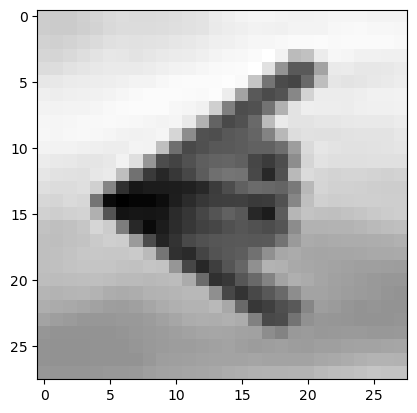

In [12]:
Used_images = Train[0,:,:,0]
plt.imshow(np.reshape(Used_images,[28,28]), interpolation="nearest", cmap = "gray")

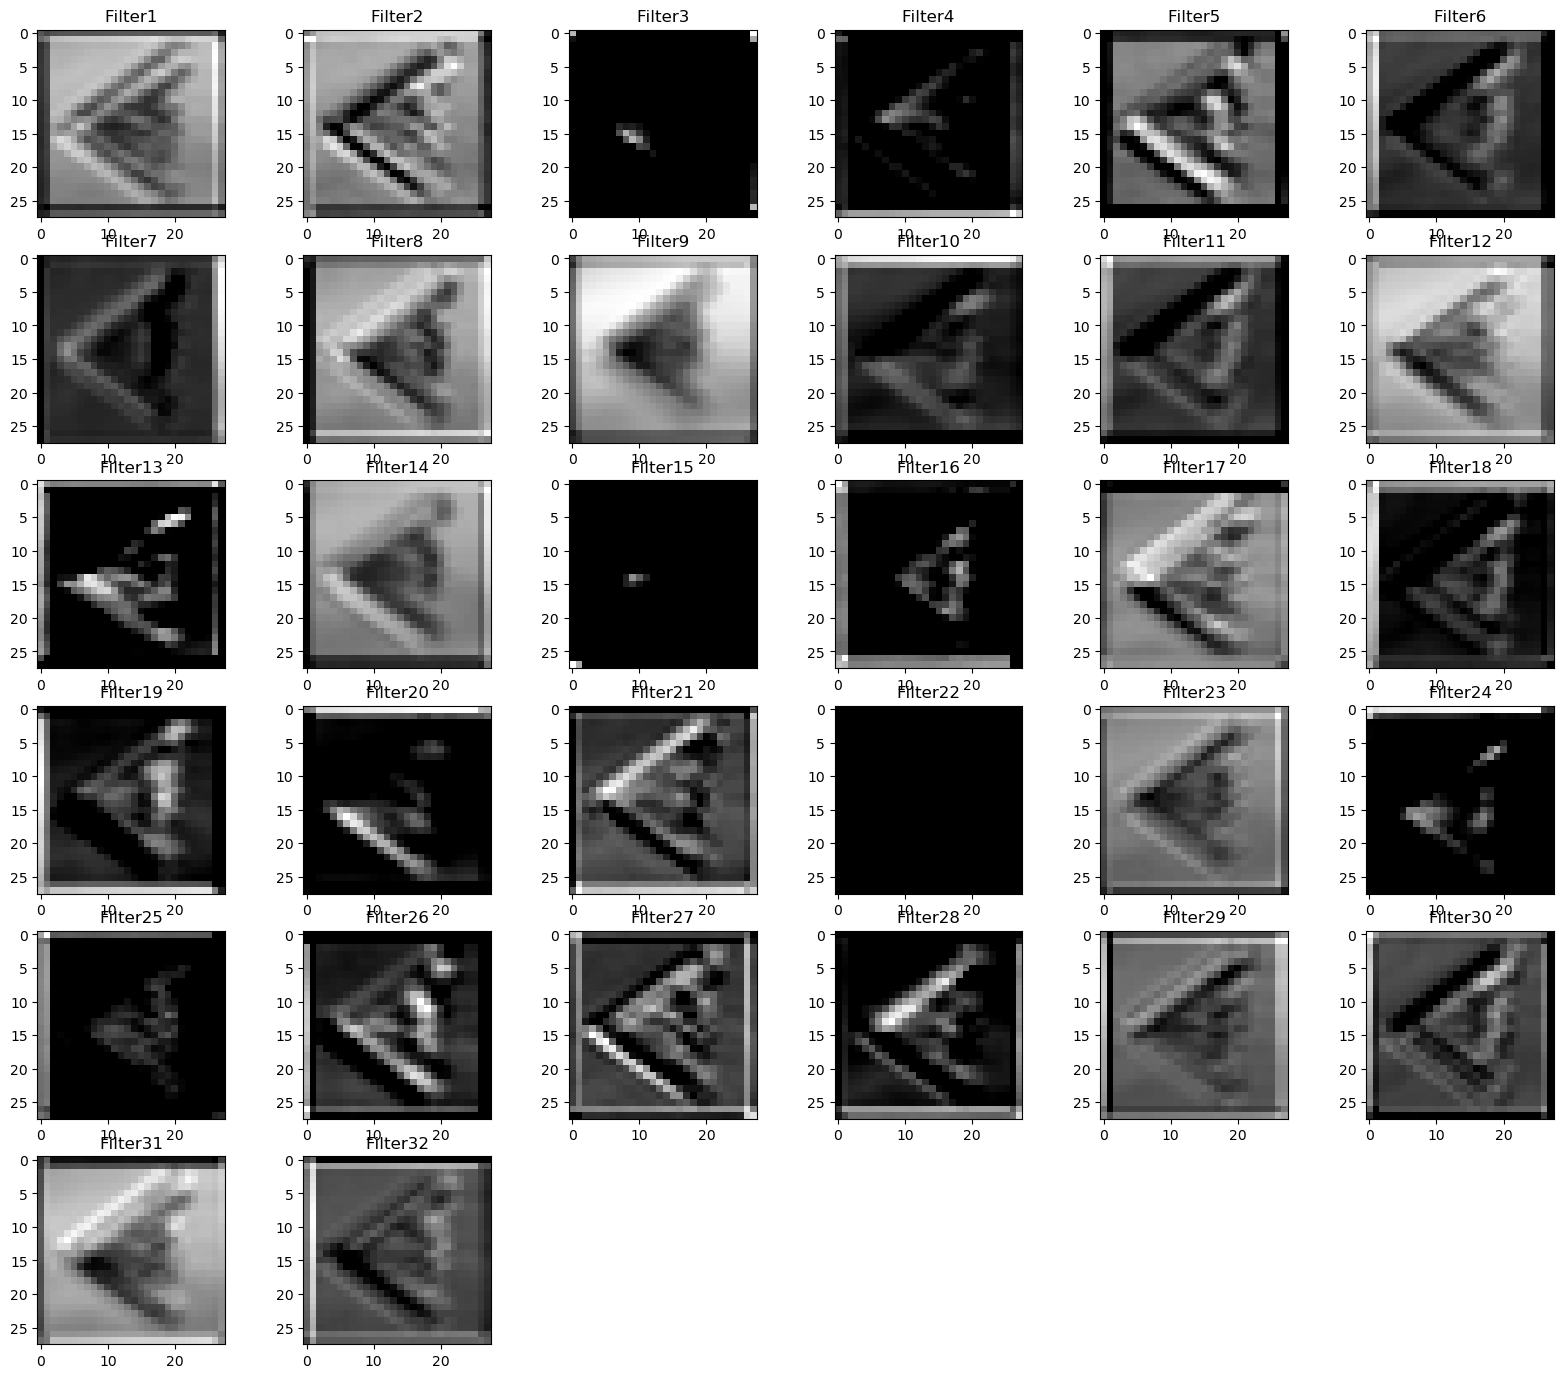

In [13]:
getActivations(h_conv1,Used_images)

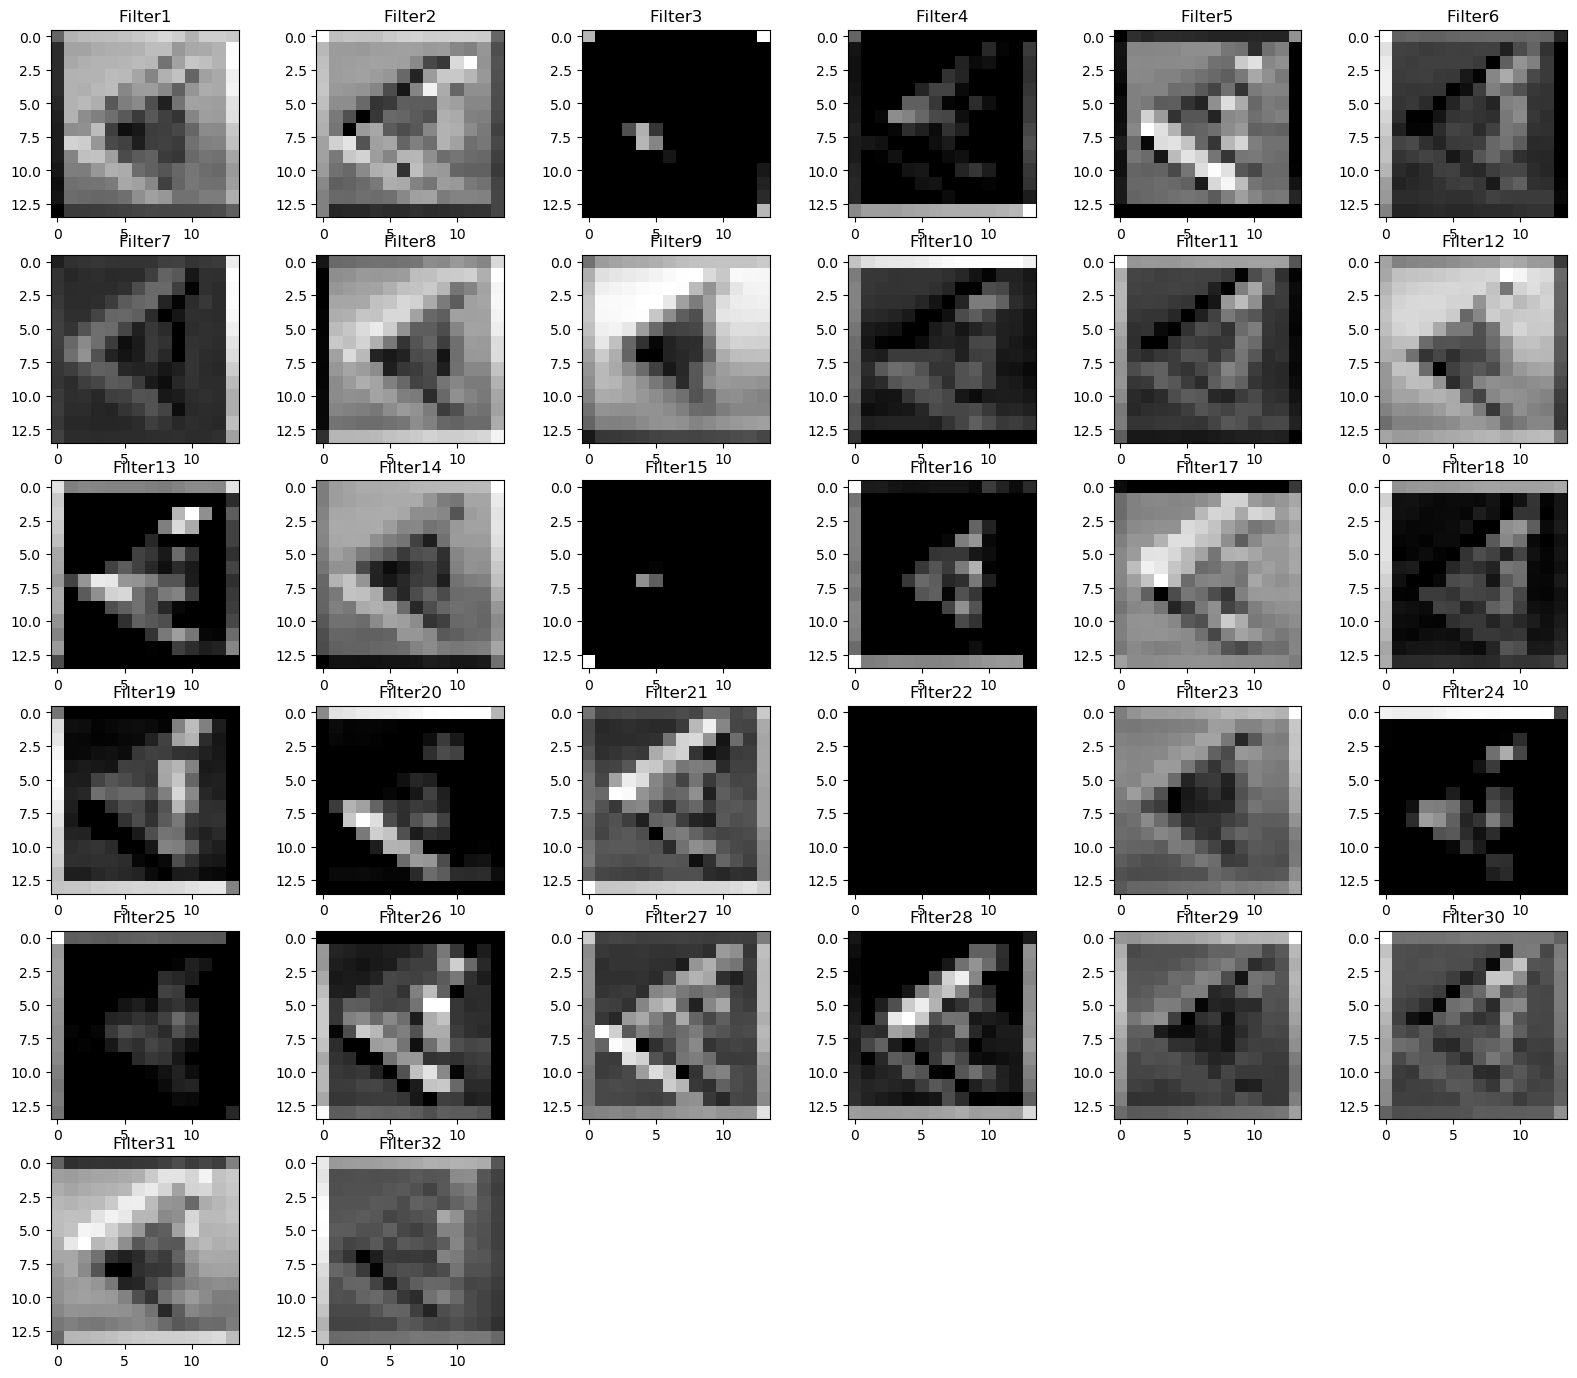

In [14]:
getActivations(h_pool1,Used_images)

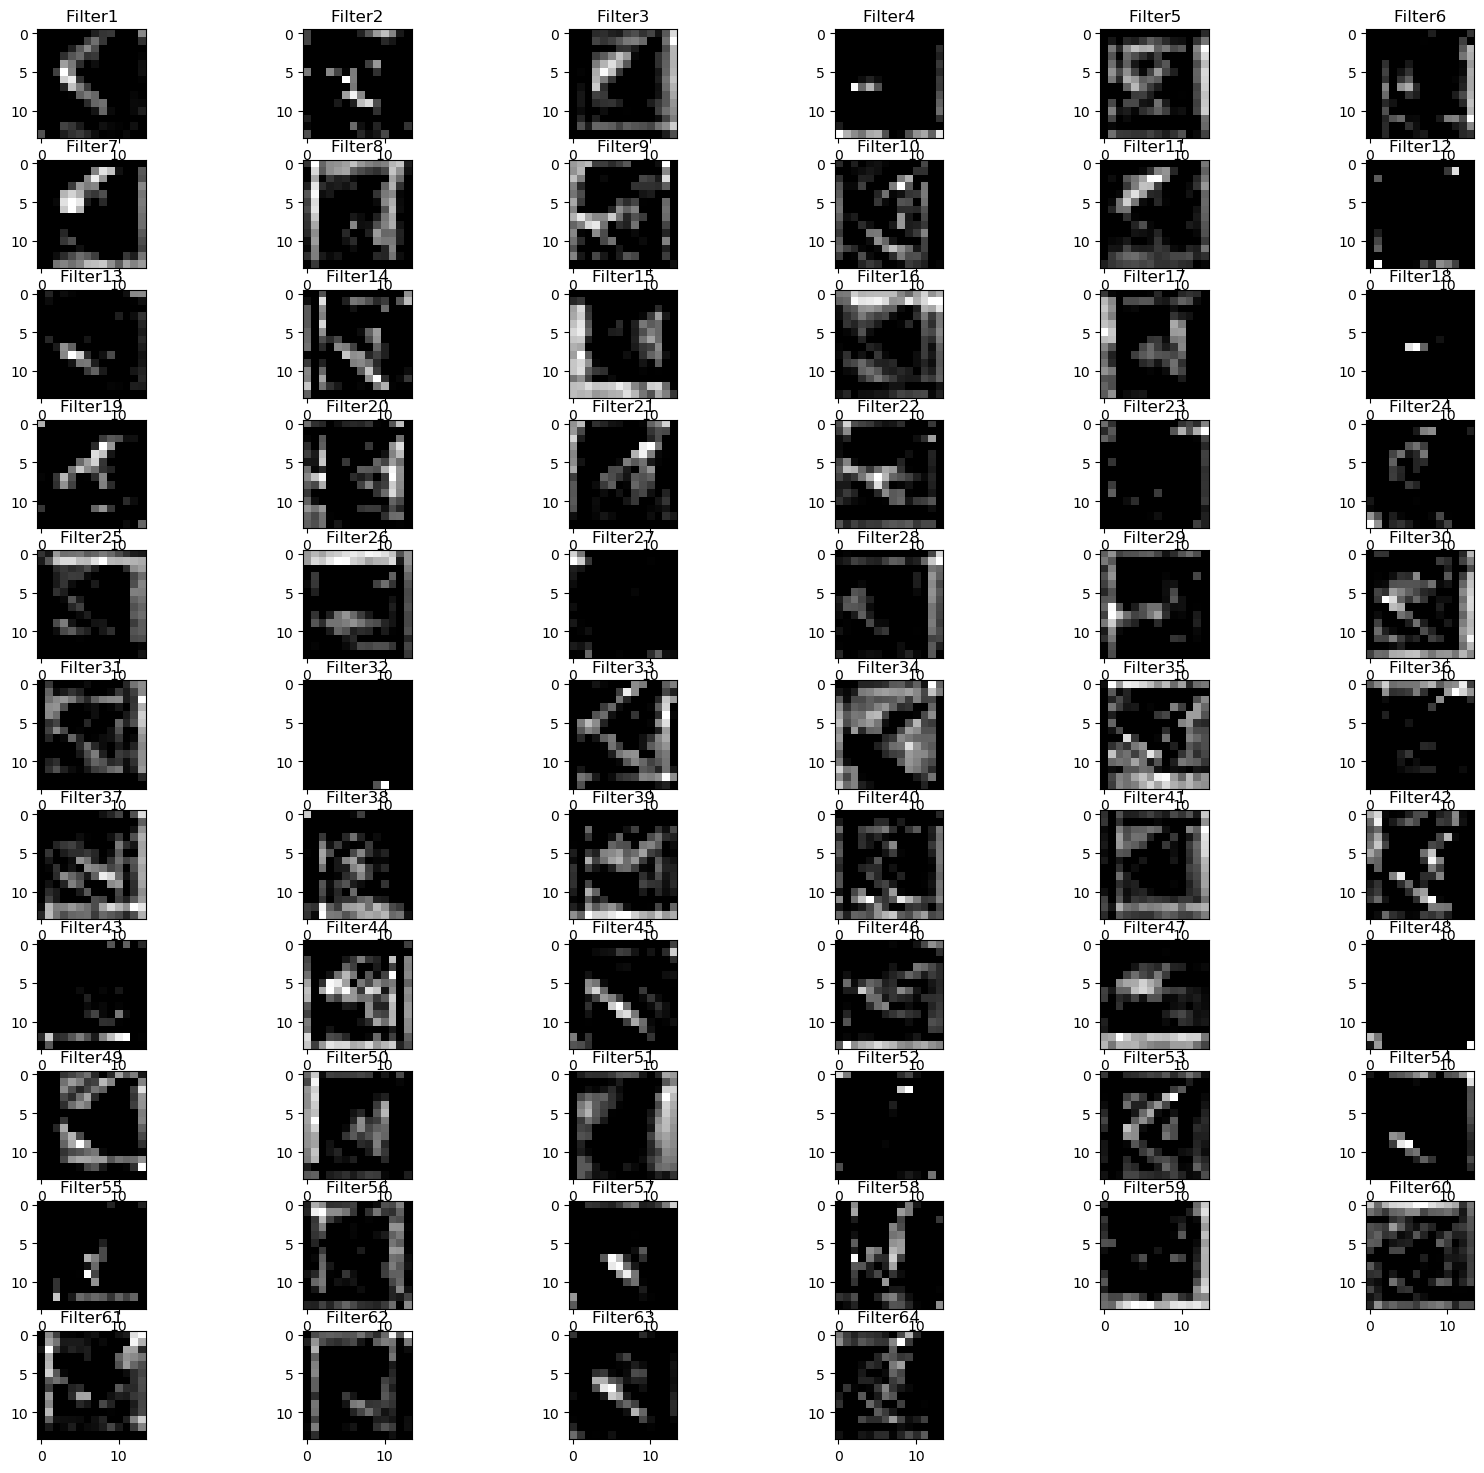

In [15]:
getActivations(h_conv2,Used_images)

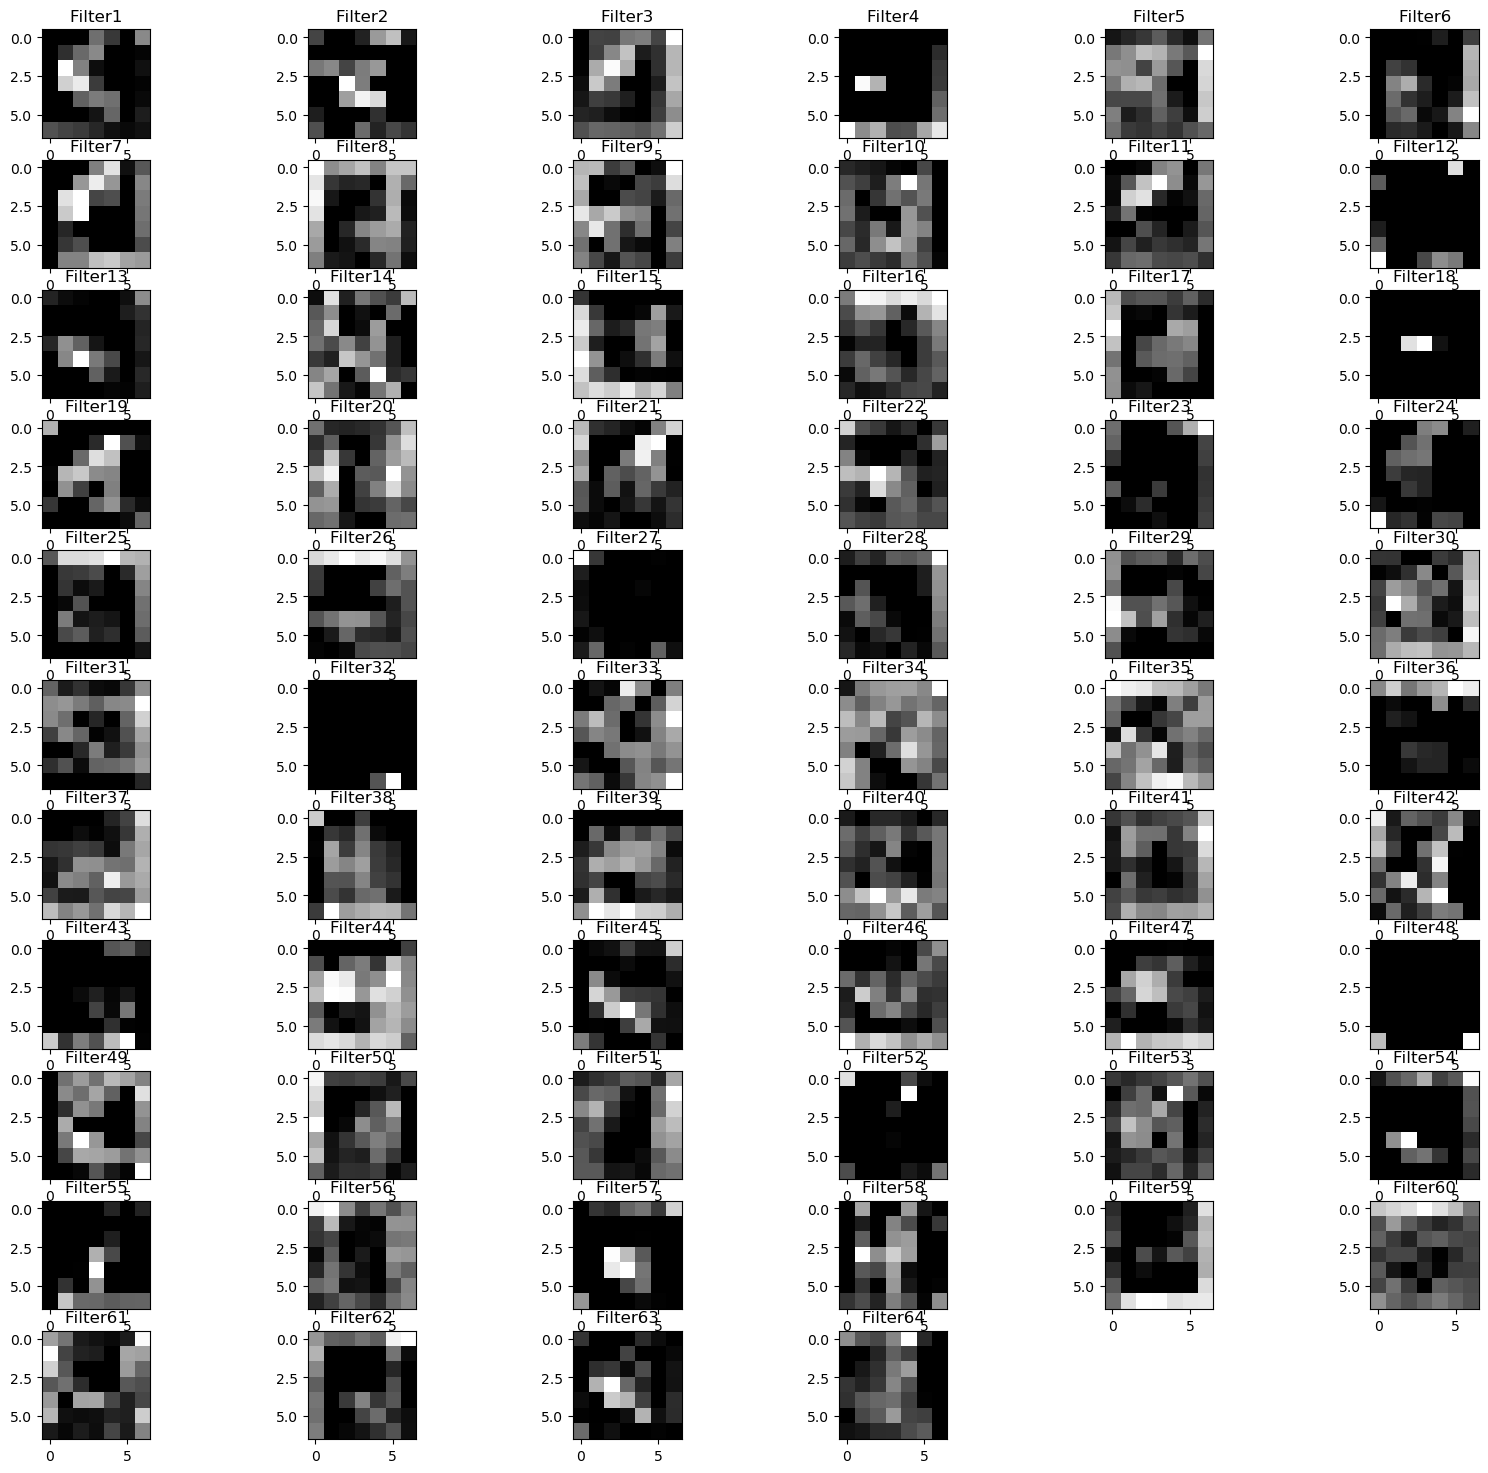

In [16]:
getActivations(h_pool2,Used_images)

In [ ]:
sess.close()